In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load csv file from github
df = pd.read_csv('https://raw.githubusercontent.com/Leri2025/Lee/main/data/raw/Avocado.csv')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [3]:
#Number of rows and columns
df.shape


(53415, 12)

In [4]:
#check data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [6]:
#Descriptive Statistics for numerical values
df.describe()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,53415.000000,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,4.102500e+04,4.102500e+04,41025.000000
mean,1.428910,8.694474e+05,2.982707e+05,2.222170e+05,2.053195e+04,2.175083e+05,1.039222e+05,2.331316e+04,2731.811796
std,0.393116,3.545274e+06,1.307669e+06,9.554624e+05,1.040977e+05,8.676947e+05,5.692608e+05,1.496622e+05,22589.096454
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.119091,1.626465e+04,6.947250e+02,2.120800e+03,0.000000e+00,7.846520e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.400000,1.203525e+05,1.458058e+04,1.751663e+04,9.005000e+01,3.695310e+04,6.945800e+02,0.000000e+00,0.000000
75%,1.690000,4.542380e+05,1.287924e+05,9.351560e+04,3.599735e+03,1.110146e+05,3.795298e+04,2.814920e+03,0.000000
max,3.440830,6.103446e+07,2.544720e+07,2.047057e+07,2.860025e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000


In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64


In [8]:
#Change date format to date from object
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
78,2015-01-04,1.13,109215.00,48285.15,37562.78,34.10,23332.97,21582.97,1750.00,0.0,conventional,Roanoke
77,2015-01-04,1.54,4212.16,238.48,1678.83,372.55,1922.30,1570.28,352.02,0.0,organic,RichmondNorfolk
76,2015-01-04,1.13,182697.97,56293.75,80396.09,9762.41,36245.72,31778.36,4467.36,0.0,conventional,RichmondNorfolk
75,2015-01-04,2.01,3397.00,58.22,1493.90,772.21,1072.67,993.94,78.73,0.0,organic,RaleighGreensboro


In [9]:
# understand text columns
print("Unique avocado types:", df['type'].unique())
print("Unique regions:", df['region'].nunique())

Unique avocado types: ['conventional' 'organic']
Unique regions: 60


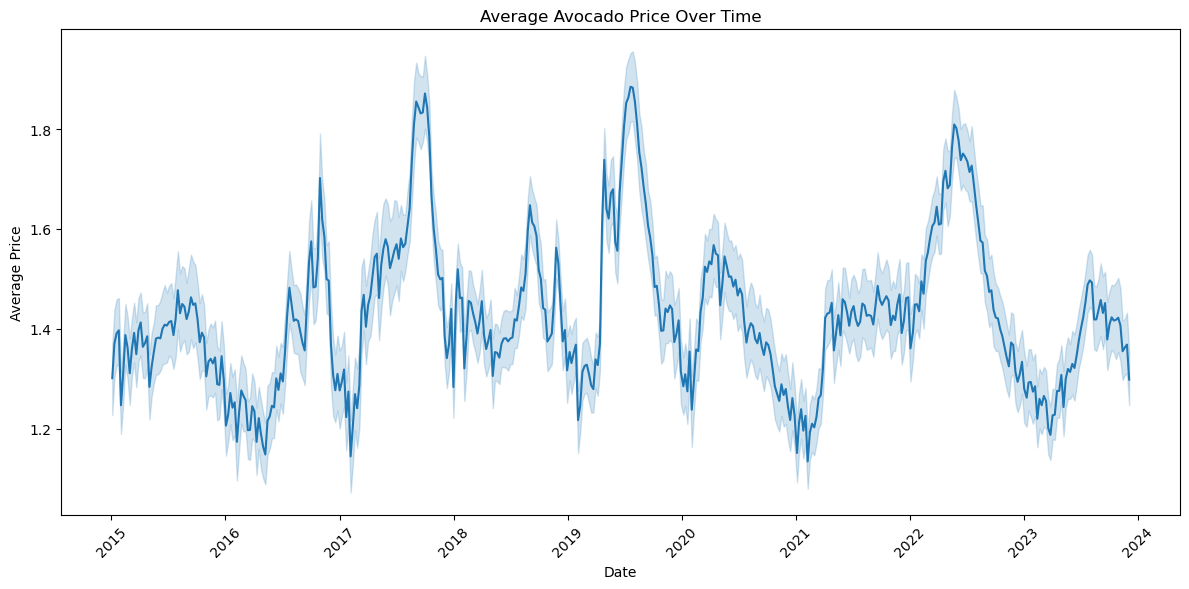

In [11]:
#Plot line graph to see price of Avocado over time on average
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='AveragePrice', data=df)
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

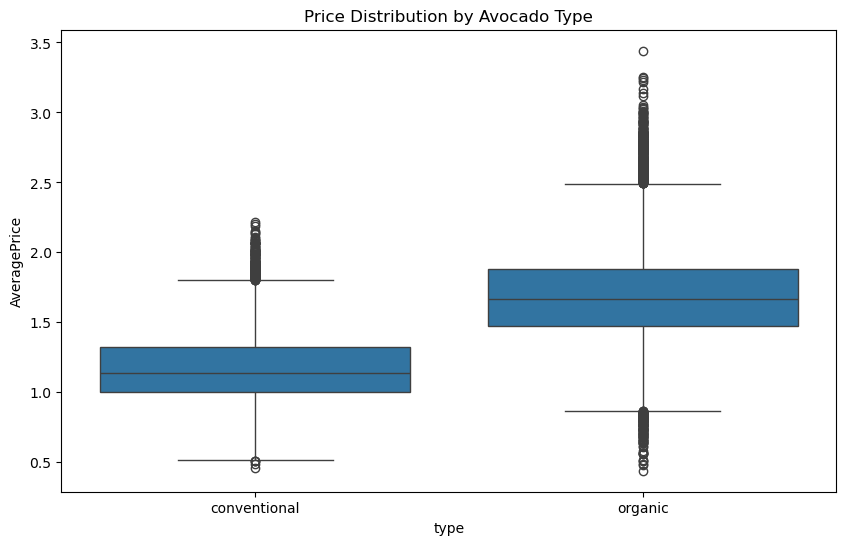

In [16]:
#Distribution by Avocado type
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Price Distribution by Avocado Type')
plt.show()

In [19]:
#Show different regions
regions = df['region'].unique()
print(f"Number of unique regions: {len(regions)}")
print("Regions:")
print(regions)

Number of unique regions: 60
Regions:
['Albany' 'Roanoke' 'RichmondNorfolk' 'RaleighGreensboro' 'Portland'
 'Plains' 'Pittsburgh' 'PhoenixTucson' 'Philadelphia' 'Orlando'
 'NorthernNewEngland' 'Northeast' 'NewYork' 'Sacramento' 'SanDiego'
 'WestTexNewMexico' 'West' 'TotalUS' 'Tampa' 'Syracuse' 'StLouis'
 'NewOrleans' 'Spokane' 'Southeast' 'SouthCentral' 'SouthCarolina'
 'Seattle' 'SanFrancisco' 'Nashville' 'Denver' 'DallasFtWorth' 'Columbus'
 'CincinnatiDayton' 'Chicago' 'Charlotte' 'California' 'BuffaloRochester'
 'Boston' 'Boise' 'BaltimoreWashington' 'Atlanta' 'Detroit' 'LosAngeles'
 'Midsouth' 'Miami' 'Louisville' 'LasVegas' 'Jacksonville' 'Indianapolis'
 'GrandRapids' 'GreatLakes' 'HarrisburgScranton' 'HartfordSpringfield'
 'Houston' 'Providence' 'PeoriaSpringfield' 'Wichita' 'Toledo'
 'BirminghamMontgomery' 'MiamiFtLauderdale']


In [22]:
grouped_counts = df.groupby(['region', 'type']).size().reset_index(name='count')
grouped_counts.head()

,region,type,count
0,Albany,conventional,466
1,Albany,organic,466
2,Atlanta,conventional,466
3,Atlanta,organic,466
4,BaltimoreWashington,conventional,466


              AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
AveragePrice      1.000000    -0.179153 -0.184299 -0.155367 -0.143928   
TotalVolume      -0.179153     1.000000  0.966413  0.930966  0.817264   
plu4046          -0.184299     0.966413  1.000000  0.880644  0.828545   
plu4225          -0.155367     0.930966  0.880644  1.000000  0.803806   
plu4770          -0.143928     0.817264  0.828545  0.803806  1.000000   
TotalBags        -0.166318     0.965620  0.920839  0.893413  0.775465   
SmallBags        -0.137005     0.707320  0.673314  0.714187  0.639742   
LargeBags        -0.127858     0.587231  0.590021  0.650030  0.585541   
XLargeBags       -0.103314     0.540959  0.475127  0.446047  0.429754   

              TotalBags  SmallBags  LargeBags  XLargeBags  
AveragePrice  -0.166318  -0.137005  -0.127858   -0.103314  
TotalVolume    0.965620   0.707320   0.587231    0.540959  
plu4046        0.920839   0.673314   0.590021    0.475127  
plu4225        0.893413   0.7

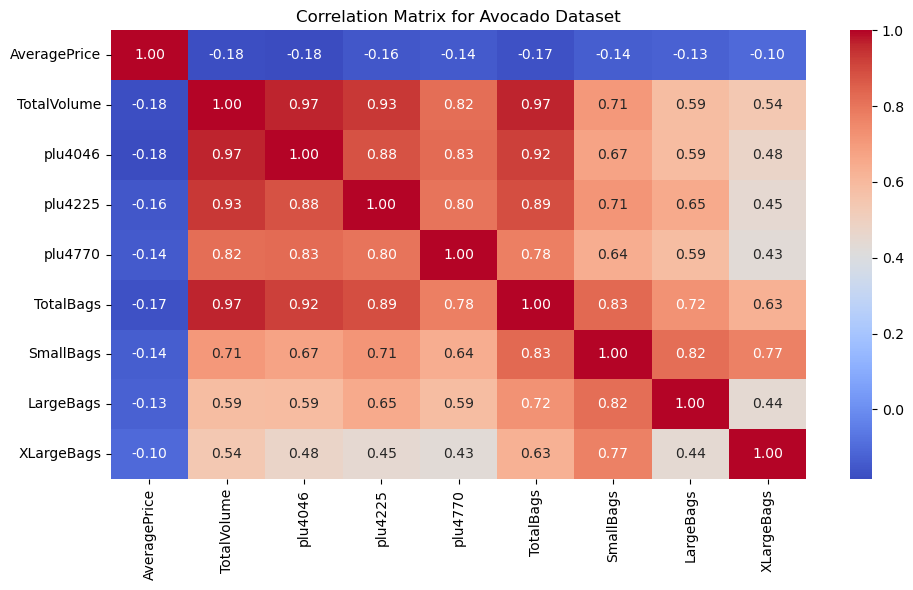

In [26]:
#Correlation with Numeric variables
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Avocado Dataset')
plt.tight_layout()
plt.show()

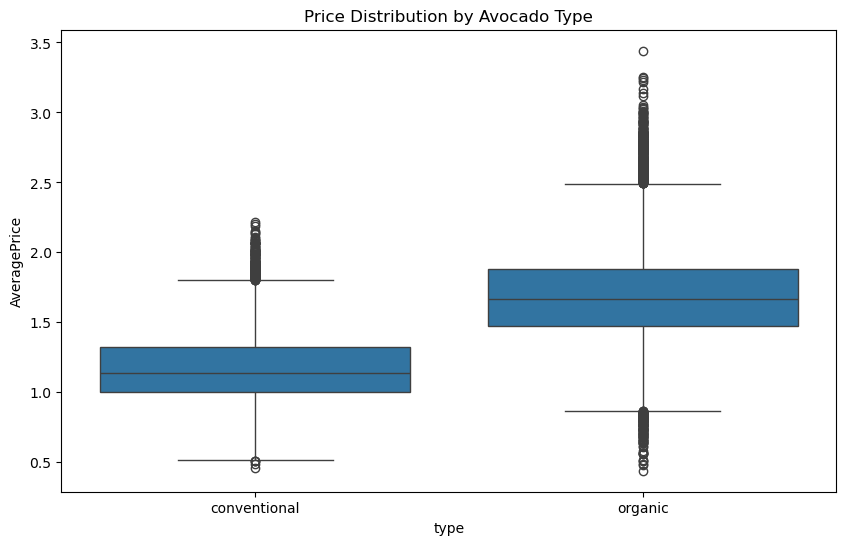